In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# TRAIN DATA

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


## Data Understanding

In [3]:
train_data.shape

(45528, 19)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [5]:
train_data.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


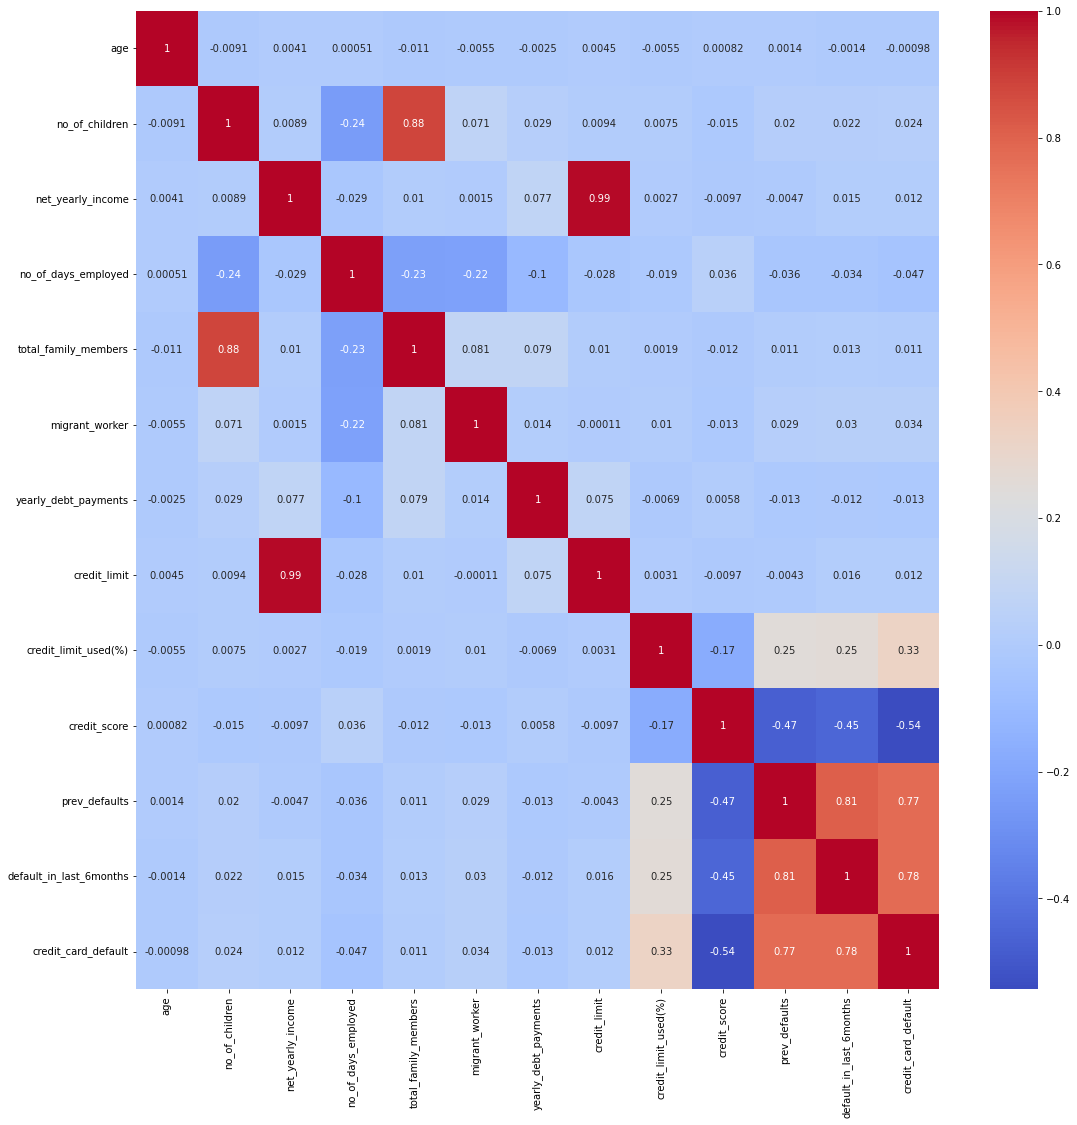

In [6]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),cmap='coolwarm',annot=True)
plt.show()

## Data Preprocessing

### Missing Value Handling

In [7]:
train_data.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [8]:
#missing values replaced with mode value
columns=['owns_car','no_of_children','no_of_days_employed','total_family_members','migrant_worker','yearly_debt_payments','credit_score']
for x in columns:
    train_data[x]= train_data[x].fillna(train_data[x].mode().iloc[0])
    
train_data.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

### Outlier Detection and Handling

In [9]:
outliers=train_data.select_dtypes(include=['int64','float64']).columns
print(outliers)

Index(['age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')


<AxesSubplot:xlabel='age'>

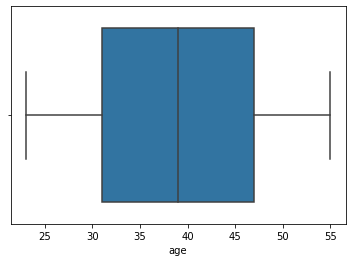

In [10]:
sns.boxplot(train_data['age'])

<AxesSubplot:xlabel='no_of_children'>

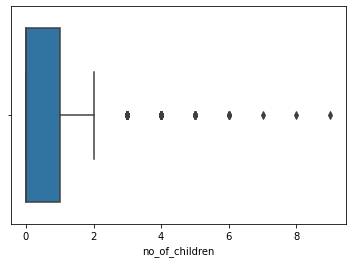

In [11]:
sns.boxplot(train_data['no_of_children'])

<AxesSubplot:xlabel='no_of_children'>

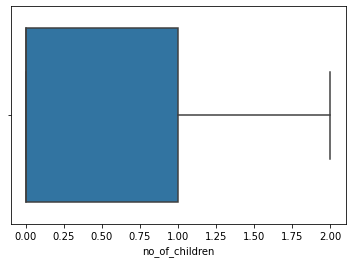

In [12]:
train_data['no_of_children'].value_counts()
median=train_data["no_of_children"].median()
train_data["no_of_children"] = np.where(train_data["no_of_children"] >2, median,train_data["no_of_children"])
sns.boxplot(train_data['no_of_children'])

<AxesSubplot:xlabel='net_yearly_income'>

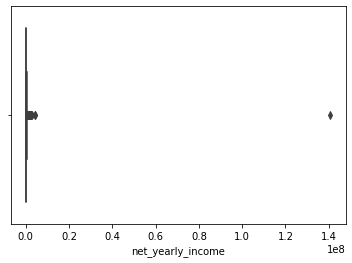

In [13]:
sns.boxplot(train_data['net_yearly_income'])

-45045.11999999998
411993.76


<AxesSubplot:xlabel='net_yearly_income'>

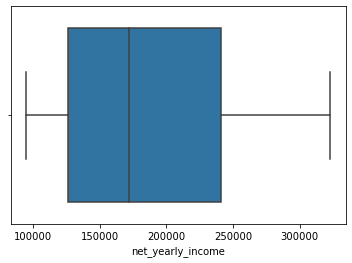

In [14]:
Q1=np.percentile(train_data['net_yearly_income'],25,interpolation="midpoint")
Q3=np.percentile(train_data['net_yearly_income'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)
tenth_percentile = int(np.percentile(train_data['net_yearly_income'], 10))
nin_percentile = int(np.percentile(train_data['net_yearly_income'], 90))

train_data['net_yearly_income'] = np.where(train_data['net_yearly_income']<tenth_percentile, tenth_percentile, train_data['net_yearly_income'])
train_data['net_yearly_income'] = np.where(train_data['net_yearly_income']>nin_percentile, nin_percentile, train_data['net_yearly_income'])
sns.boxplot(train_data['net_yearly_income'])

<AxesSubplot:xlabel='no_of_days_employed'>

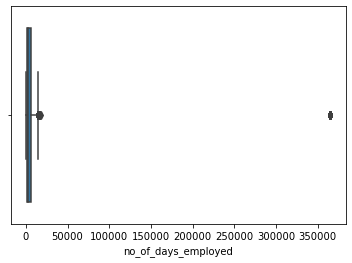

In [15]:
sns.boxplot(train_data['no_of_days_employed'])

-6942.75
14095.25


<AxesSubplot:xlabel='no_of_days_employed'>

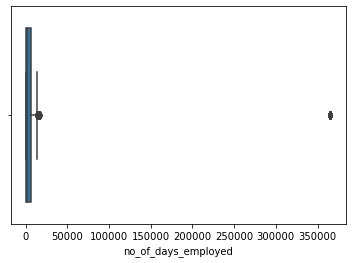

In [16]:
Q1=np.percentile(train_data['no_of_days_employed'],25,interpolation="midpoint")
Q3=np.percentile(train_data['no_of_days_employed'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

tenth_percentile = int(np.percentile(train_data['no_of_days_employed'], 10))
nin_percentile = int(np.percentile(train_data['no_of_days_employed'], 90))

train_data['no_of_days_employed'] = np.where(train_data['no_of_days_employed']<tenth_percentile, tenth_percentile, train_data['no_of_days_employed'])
train_data['no_of_days_employed'] = np.where(train_data['no_of_days_employed']>nin_percentile, nin_percentile, train_data['no_of_days_employed'])
sns.boxplot(train_data['no_of_days_employed'])

<AxesSubplot:xlabel='total_family_members'>

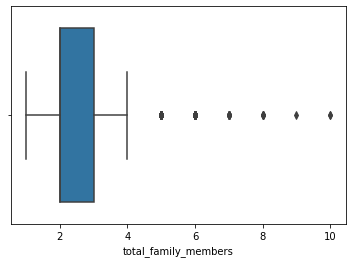

In [17]:
sns.boxplot(train_data['total_family_members'])

<AxesSubplot:xlabel='total_family_members'>

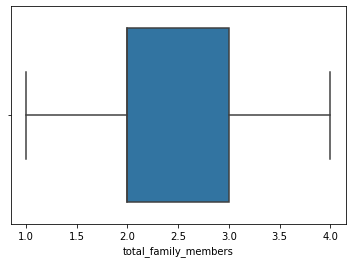

In [18]:
median=train_data['total_family_members'].median()
train_data["total_family_members"] = np.where(train_data["total_family_members"] >4, median,train_data["total_family_members"])
sns.boxplot(train_data['total_family_members'])

<AxesSubplot:xlabel='yearly_debt_payments'>

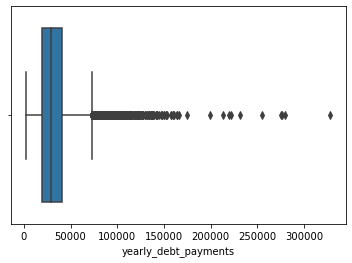

In [19]:
sns.boxplot(train_data['yearly_debt_payments'])

-12918.637499999986
72608.42249999999


<AxesSubplot:xlabel='yearly_debt_payments'>

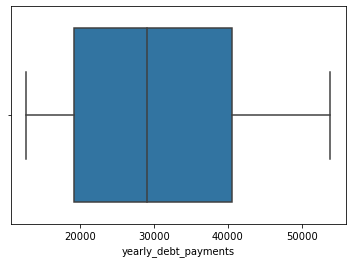

In [20]:
Q1=np.percentile(train_data['yearly_debt_payments'],25,interpolation="midpoint")
Q3=np.percentile(train_data['yearly_debt_payments'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

tenth_percentile = int(np.percentile(train_data['yearly_debt_payments'], 10))
nin_percentile = int(np.percentile(train_data['yearly_debt_payments'], 90))

train_data['yearly_debt_payments'] = np.where(train_data['yearly_debt_payments']<tenth_percentile, tenth_percentile, train_data['yearly_debt_payments'])
train_data['yearly_debt_payments'] = np.where(train_data['yearly_debt_payments']>nin_percentile, nin_percentile, train_data['yearly_debt_payments'])
sns.boxplot(train_data['yearly_debt_payments'])

<AxesSubplot:xlabel='credit_limit'>

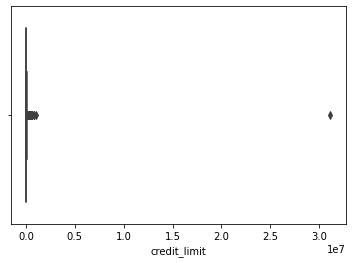

In [21]:
sns.boxplot(train_data['credit_limit'])

-20220.087499999994
97629.77249999999


<AxesSubplot:xlabel='credit_limit'>

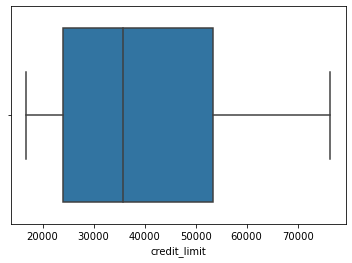

In [22]:
Q1=np.percentile(train_data['credit_limit'],25,interpolation="midpoint")
Q3=np.percentile(train_data['credit_limit'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

tenth_percentile = int(np.percentile(train_data['credit_limit'], 10))
nin_percentile = int(np.percentile(train_data['credit_limit'], 90))

train_data['credit_limit'] = np.where(train_data['credit_limit']<tenth_percentile, tenth_percentile, train_data['credit_limit'])
train_data['credit_limit'] = np.where(train_data['credit_limit']>nin_percentile, nin_percentile, train_data['credit_limit'])
sns.boxplot(train_data['credit_limit'])

<AxesSubplot:xlabel='credit_limit_used(%)'>

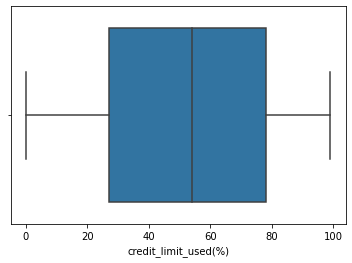

In [23]:
sns.boxplot(train_data['credit_limit_used(%)'])

<AxesSubplot:xlabel='credit_score'>

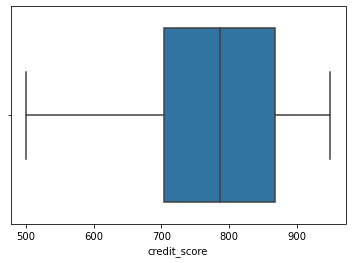

In [24]:
sns.boxplot(train_data['credit_score'])

## Encoding

In [25]:
from sklearn import preprocessing   
train_data.nunique()

customer_id                45528
name                        4010
age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                 3
net_yearly_income          36400
no_of_days_employed         7512
occupation_type               19
total_family_members           4
migrant_worker                 2
yearly_debt_payments       36258
credit_limit               36280
credit_limit_used(%)         100
credit_score                 450
prev_defaults                  3
default_in_last_6months        2
credit_card_default            2
dtype: int64

In [26]:
train_data['gender'].value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [27]:
train_data['gender'] = np.where(train_data['gender']=='XNA', 'F', train_data['gender'])
train_data['gender'].value_counts()

F    29958
M    15570
Name: gender, dtype: int64

In [28]:
labencoder = preprocessing.LabelEncoder()
to_be_columns=train_data.select_dtypes(include=['object']).columns
print(to_be_columns)
label_encode = ['name','occupation_type']
for i in label_encode:
    train_data[i]= labencoder.fit_transform(train_data[i])   
train_data.head()

Index(['customer_id', 'name', 'gender', 'owns_car', 'owns_house',
       'occupation_type'],
      dtype='object')


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,3939,46,F,N,Y,0.0,107934.04,612.0,17,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,170,29,M,N,Y,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,3557,37,M,N,Y,0.0,230153.17,394.0,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,2899,39,F,N,Y,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,2289,46,M,Y,Y,0.0,322943.00,1459.0,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


### One Hot Encoding

In [29]:
hot_encode=['gender', 'owns_car', 'owns_house']
gender_opt= pd.get_dummies(train_data['gender'])
gender_opt.rename(columns={'F':'gender_female','M':'gender_male'},inplace=True)

owns_car= pd.get_dummies(train_data['owns_car'])
owns_car.rename(columns={'N':'owns_car_No','Y':'owns_car_Yes'},inplace=True)

own_house= pd.get_dummies(train_data['owns_house'])
own_house.rename(columns={'N':'owns_house_No','Y':'owns_house_Yes'},inplace=True)

train_data=pd.concat([train_data,owns_car,own_house,gender_opt],axis=1)
train_data.drop(['gender','owns_car','owns_house'],axis=1,inplace=True)

train_data.head()

,customer_id,name,age,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,...,credit_score,prev_defaults,default_in_last_6months,credit_card_default,owns_car_No,owns_car_Yes,owns_house_No,owns_house_Yes,gender_female,gender_male
0,CST_115179,3939,46,0.0,107934.04,612.0,17,1.0,1.0,33070.28,...,544.0,2,1,1,1,0,0,1,1,0
1,CST_121920,170,29,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,...,857.0,0,0,0,1,0,0,1,0,1
2,CST_109330,3557,37,0.0,230153.17,394.0,8,2.0,0.0,48416.60,...,650.0,0,0,0,1,0,0,1,0,1
3,CST_128288,2899,39,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,...,754.0,0,0,0,1,0,0,1,1,0
4,CST_151355,2289,46,0.0,322943.00,1459.0,3,1.0,0.0,38282.95,...,927.0,0,0,0,0,1,0,1,0,1


### Standradization

In [30]:
X=train_data.drop(['credit_card_default','customer_id'],axis=1)

scale=preprocessing.StandardScaler()
for column in X.columns:
    get_column = X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    X[column] = scale.fit_transform(reshaped_vals)
    
X

,name,age,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,owns_car_No,owns_car_Yes,owns_house_No,owns_house_Yes,gender_female,gender_male
0,1.773035,0.734144,-0.578865,-1.087041,-0.493992,1.118488,-1.335210,2.143317,0.183326,-1.113999,0.706855,-2.372980,7.328405,4.334303,0.709275,-0.709275,-0.662455,0.662455,0.720921,-0.720921
1,-1.625000,-1.047101,-0.578865,-1.060716,-0.478765,-0.487568,-0.135568,-0.466567,-1.156514,-0.124826,-0.008000,0.737705,-0.229417,-0.230718,0.709275,-0.709275,-0.662455,0.662455,-1.387114,1.387114
2,1.428633,-0.208868,-0.578865,0.581275,-0.495530,-0.487568,-0.135568,-0.466567,1.342331,0.075206,-0.314367,-1.319521,-0.229417,-0.230718,0.709275,-0.709275,-0.662455,0.662455,-1.387114,1.387114
3,0.835397,0.000690,-0.578865,-0.890591,-0.414088,-1.379822,-0.135568,-0.466567,-0.609360,-0.390490,-1.097303,-0.285939,-0.229417,-0.230718,0.709275,-0.709275,-0.662455,0.662455,0.720921,-0.720921
4,0.285437,0.734144,-0.578865,1.847875,-0.488018,-1.379822,-1.335210,-0.466567,0.577004,0.664542,0.774936,1.433386,-0.229417,-0.230718,-1.409891,1.409891,-0.662455,0.662455,-1.387114,1.387114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,-0.937098,1.677156,2.575670,-1.247110,-0.495530,1.118488,2.263714,-0.466567,-1.352764,-0.544358,1.013221,1.234620,-0.229417,-0.230718,0.709275,-0.709275,1.509536,-1.509536,0.720921,-0.720921
45524,0.105122,-0.837543,-0.578865,1.847875,-0.491495,-1.915174,-0.135568,2.143317,0.961189,1.881258,-0.688815,-1.031311,-0.229417,-0.230718,0.709275,-0.709275,-0.662455,0.662455,0.720921,-0.720921
45525,-0.341158,-1.256659,-0.578865,0.989403,-0.488293,-1.379822,-0.135568,-0.466567,-0.599304,1.881258,-0.212245,-0.554273,-0.229417,-0.230718,0.709275,-0.709275,-0.662455,0.662455,0.720921,-0.720921
45526,1.322247,-0.732763,-0.578865,-0.412325,-0.480979,-0.487568,-0.135568,-0.466567,-0.792449,-0.758507,1.353628,0.220914,-0.229417,-0.230718,-1.409891,1.409891,1.509536,-1.509536,-1.387114,1.387114


### Normalization

In [31]:
minmaxscale=preprocessing.MinMaxScaler()
for column in X.columns:
    get_column = X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    X[column] = minmaxscale.fit_transform(reshaped_vals)
    
X

,name,age,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,owns_car_No,owns_car_Yes,owns_house_No,owns_house_Yes,gender_female,gender_male
0,0.982539,0.71875,0.0,0.058477,0.000598,0.944444,0.000000,1.0,0.495210,0.032886,0.737374,0.097996,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.042405,0.18750,0.0,0.066922,0.006515,0.444444,0.333333,0.0,0.063268,0.352272,0.525253,0.795100,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.887254,0.43750,0.0,0.593674,0.000000,0.444444,0.333333,0.0,0.868855,0.416858,0.434343,0.334076,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.723123,0.50000,0.0,0.121499,0.031648,0.166667,0.333333,0.0,0.239661,0.266494,0.202020,0.565702,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.570965,0.71875,0.0,1.000000,0.002919,0.166667,0.000000,0.0,0.622126,0.607145,0.757576,0.951002,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,0.232726,1.00000,1.0,0.007127,0.000000,0.944444,1.000000,0.0,0.000000,0.216813,0.828283,0.906459,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
45524,0.521078,0.25000,0.0,1.000000,0.001568,0.000000,0.333333,1.0,0.745980,1.000000,0.323232,0.398664,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
45525,0.397605,0.12500,0.0,0.724602,0.002812,0.166667,0.333333,0.0,0.242903,1.000000,0.464646,0.505568,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
45526,0.857820,0.28125,0.0,0.274926,0.005654,0.444444,0.333333,0.0,0.180636,0.147668,0.929293,0.679287,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


## Modeling

In [32]:
y=train_data['credit_card_default']
X=X

In [33]:
from sklearn.model_selection import train_test_split
#Split the Data into Training and Testing sets with test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31869, 20) (13659, 20) (31869,) (13659,)


### Decision Tree classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score

dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))


ACCURACY of the model:  0.9713741855187056
F - score of the model:  0.9075867757460625


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy') 
clf.fit(X_train, y_train)
 
# performing predictions on the dataset
y_pred = clf.predict(X_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.9803792371330259
F - score of the model:  0.9287557429619328


### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred=logic_model.predict(X_test)

# performing predictions on the dataset
y_pred = logic_model.predict(X_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))

ACCURACY of the model:  0.9808185079434805
F - score of the model:  0.9305393333623184


# TEST DATA

In [37]:
test_data=pd.read_csv('test.csv')
test_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [38]:
test_data.shape

(11383, 18)

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11251 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11193 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11352 non-null  float64
 11  migrant_worker           11357 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

In [40]:
test_data.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
count,11383.000000,11193.000000,1.138300e+04,11278.000000,11352.000000,11357.000000,11361.000000,11383.000000,11383.000000,11380.000000,11383.000000,11383.000000
mean,39.073004,0.419012,1.987084e+05,65519.798280,2.157593,0.178040,32078.968043,42972.207247,51.780989,784.389455,0.058069,0.048669
std,9.572474,0.727709,1.151905e+05,137572.106971,0.917391,0.382563,17417.412533,29325.712903,29.386130,100.468636,0.260202,0.215185
min,23.000000,0.000000,3.030994e+04,-3.000000,1.000000,0.000000,2371.740000,3604.650000,0.000000,500.000000,0.000000,0.000000
25%,31.000000,0.000000,1.274479e+05,934.250000,2.000000,0.000000,19522.320000,24148.525000,26.000000,705.000000,0.000000,0.000000
50%,39.000000,0.000000,1.728695e+05,2216.000000,2.000000,0.000000,29246.110000,35793.490000,53.000000,787.000000,0.000000,0.000000
75%,47.000000,1.000000,2.402339e+05,5517.000000,3.000000,0.000000,40729.260000,53527.890000,78.000000,870.000000,0.000000,0.000000
max,55.000000,11.000000,2.472450e+06,365252.000000,13.000000,1.000000,280114.740000,421517.090000,99.000000,949.000000,2.000000,1.000000


In [41]:
test_data.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

### Bivariate Analysis

<AxesSubplot:>

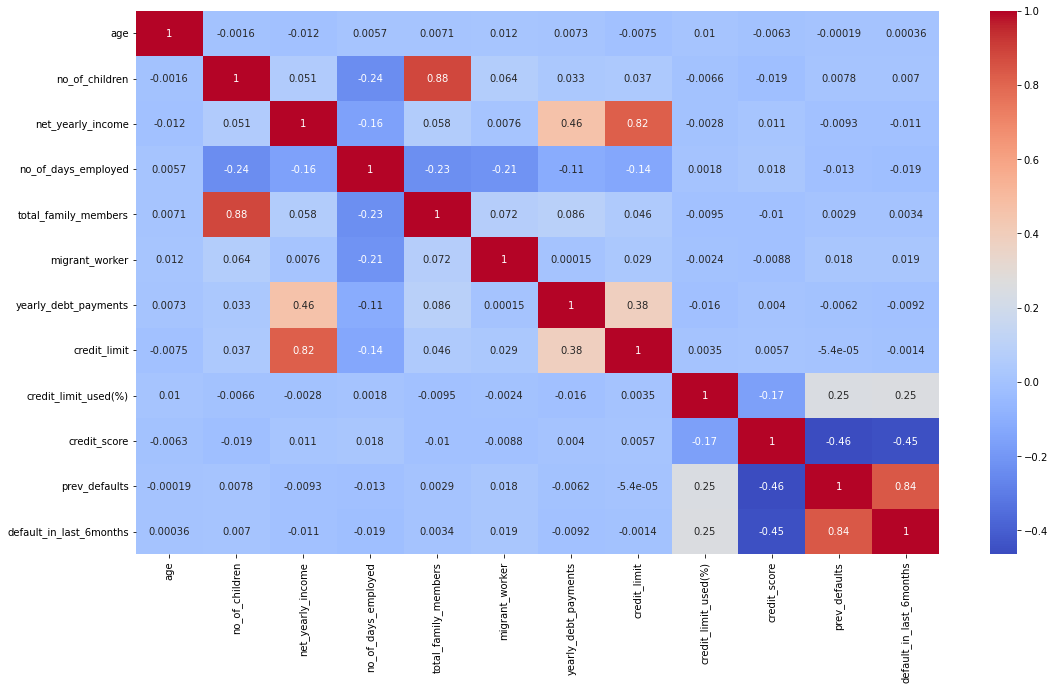

In [42]:
#get correlations of numerical features in dataset
plt.figure(figsize=(18,10))
#plot heat map
sns.heatmap(test_data.corr(),cmap='coolwarm',annot=True)

### Preprocessing

In [43]:
test_data.fillna(axis=0,method='ffill',inplace=True)
test_data.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

### Outlier Detection and Handling

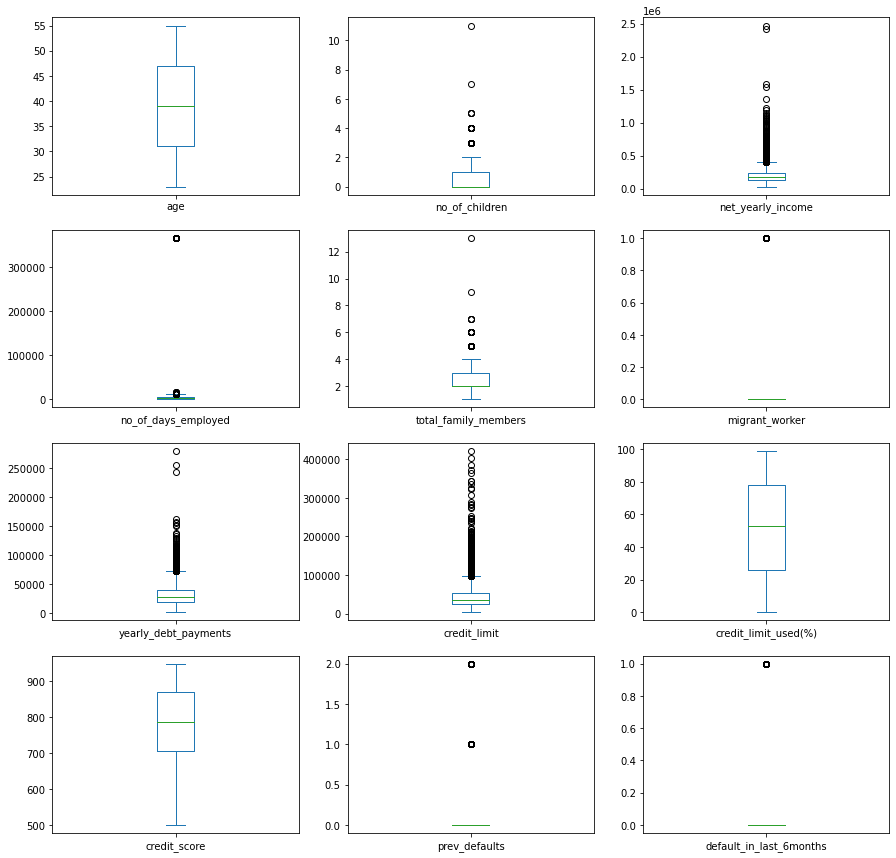

In [44]:
test_data.plot(kind="box",subplots=True,layout=(4,3),figsize=(15,15))
plt.show()

<AxesSubplot:xlabel='no_of_children'>

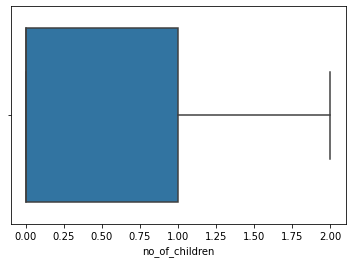

In [45]:
#outlier handling - no-of-children
test_data['no_of_children'].value_counts()
median=test_data["no_of_children"].median()
test_data["no_of_children"] = np.where(test_data["no_of_children"] >2, median,test_data["no_of_children"])
sns.boxplot(test_data['no_of_children'])

<AxesSubplot:xlabel='net_yearly_income'>

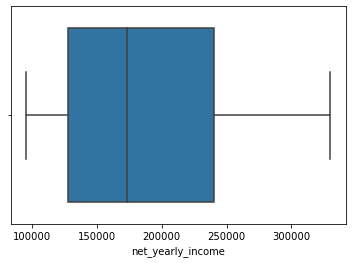

In [46]:
#net-yearly-income
tenth_percentile = int(np.percentile(test_data['net_yearly_income'], 10))
nin_percentile = int(np.percentile(test_data['net_yearly_income'], 90))

test_data['net_yearly_income'] = np.where(test_data['net_yearly_income']<tenth_percentile, tenth_percentile, test_data['net_yearly_income'])
test_data['net_yearly_income'] = np.where(test_data['net_yearly_income']>nin_percentile, nin_percentile, test_data['net_yearly_income'])
sns.boxplot(test_data['net_yearly_income'])

<AxesSubplot:xlabel='no_of_days_employed'>

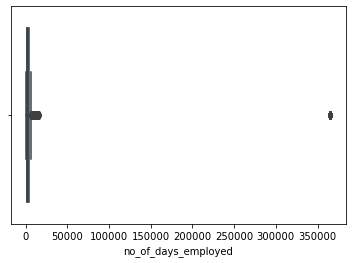

In [47]:
#no-of-days-employed

tenth_percentile = int(np.percentile(test_data['no_of_days_employed'], 10))
nin_percentile = int(np.percentile(test_data['no_of_days_employed'], 90))
median=train_data["no_of_days_employed"].median()

test_data['no_of_days_employed'] = np.where(test_data['no_of_days_employed']<tenth_percentile, median, test_data['no_of_days_employed'])
test_data['no_of_days_employed'] = np.where(test_data['no_of_days_employed']>nin_percentile, median, test_data['no_of_days_employed'])
sns.boxplot(test_data['no_of_days_employed'])

<AxesSubplot:xlabel='total_family_members'>

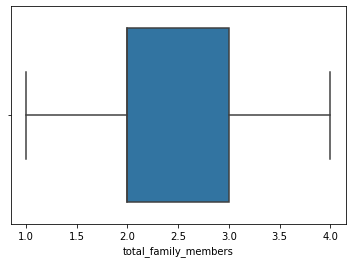

In [48]:
median=test_data['total_family_members'].median()
test_data["total_family_members"] = np.where(test_data["total_family_members"] >4, median,test_data["total_family_members"])
sns.boxplot(test_data['total_family_members'])

<AxesSubplot:xlabel='yearly_debt_payments'>

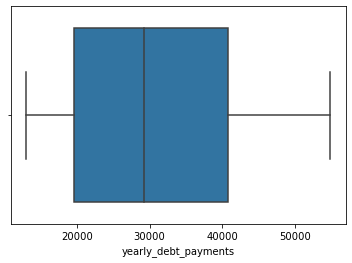

In [49]:
tenth_percentile = int(np.percentile(test_data['yearly_debt_payments'], 10))
nin_percentile = int(np.percentile(test_data['yearly_debt_payments'], 90))

test_data['yearly_debt_payments'] = np.where(test_data['yearly_debt_payments']<tenth_percentile, tenth_percentile, test_data['yearly_debt_payments'])
test_data['yearly_debt_payments'] = np.where(test_data['yearly_debt_payments']>nin_percentile, nin_percentile, test_data['yearly_debt_payments'])
sns.boxplot(test_data['yearly_debt_payments'])

<AxesSubplot:xlabel='credit_limit'>

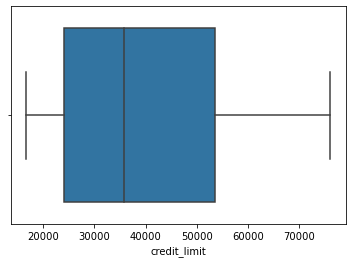

In [50]:

tenth_percentile = int(np.percentile(test_data['credit_limit'], 10))
nin_percentile = int(np.percentile(test_data['credit_limit'], 90))

test_data['credit_limit'] = np.where(test_data['credit_limit']<tenth_percentile, tenth_percentile, test_data['credit_limit'])
test_data['credit_limit'] = np.where(test_data['credit_limit']>nin_percentile, nin_percentile, test_data['credit_limit'])
sns.boxplot(test_data['credit_limit'])

### Encoding

In [51]:
from sklearn import preprocessing   
test_data.nunique()

customer_id                11383
name                        2459
age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                 3
net_yearly_income           9104
no_of_days_employed         4232
occupation_type               19
total_family_members           4
migrant_worker                 2
yearly_debt_payments        9076
credit_limit                9096
credit_limit_used(%)         100
credit_score                 449
prev_defaults                  3
default_in_last_6months        2
dtype: int64

In [52]:
test_data['gender'].value_counts()

F      7443
M      3939
XNA       1
Name: gender, dtype: int64

In [53]:
test_data['gender'] = np.where(test_data['gender']=='XNA', 'F', test_data['gender'])
test_data['gender'].value_counts()

F    7444
M    3939
Name: gender, dtype: int64

In [54]:
labencoder = preprocessing.LabelEncoder()
to_be_columns=test_data.select_dtypes(include=['object']).columns
print(to_be_columns)
label_encode = ['name','occupation_type']
for i in label_encode:
    test_data[i]= labencoder.fit_transform(test_data[i])   
test_data.head()

Index(['customer_id', 'name', 'gender', 'owns_car', 'owns_house',
       'occupation_type'],
      dtype='object')


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,1992,52,F,Y,N,0.0,232640.53,998.0,17,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,1923,48,F,N,N,1.0,284396.79,1338.0,17,3.0,0.0,54844.00,68998.72,70,806.0,0,0
2,CST_138443,2228,50,F,N,N,1.0,149419.28,1210.0,17,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,1016,30,F,N,N,1.0,160437.54,503.0,8,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,1384,52,M,N,Y,0.0,233480.37,2261.0,8,2.0,1.0,54213.72,76021.00,82,613.0,1,1


In [55]:
hot_encode=['gender', 'owns_car', 'owns_house']
gender_opt= pd.get_dummies(test_data['gender'])
gender_opt.rename(columns={'F':'gender_female','M':'gender_male'},inplace=True)

owns_car= pd.get_dummies(test_data['owns_car'])
owns_car.rename(columns={'N':'owns_car_No','Y':'owns_car_Yes'},inplace=True)

own_house= pd.get_dummies(test_data['owns_house'])
own_house.rename(columns={'N':'owns_house_No','Y':'owns_house_Yes'},inplace=True)

test_data=pd.concat([test_data,owns_car,own_house,gender_opt],axis=1)
test_data.drop(['gender','owns_car','owns_house'],axis=1,inplace=True)

test_data.head()

,customer_id,name,age,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,...,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,owns_car_No,owns_car_Yes,owns_house_No,owns_house_Yes,gender_female,gender_male
0,CST_142525,1992,52,0.0,232640.53,998.0,17,2.0,0.0,14406.73,...,4,779.0,0,0,0,1,1,0,1,0
1,CST_129215,1923,48,1.0,284396.79,1338.0,17,3.0,0.0,54844.00,...,70,806.0,0,0,1,0,1,0,1,0
2,CST_138443,2228,50,1.0,149419.28,1210.0,17,3.0,0.0,21611.01,...,71,528.0,2,0,1,0,1,0,1,0
3,CST_123812,1016,30,1.0,160437.54,503.0,8,2.0,1.0,28990.76,...,9,815.0,0,0,1,0,1,0,1,0
4,CST_144450,1384,52,0.0,233480.37,2261.0,8,2.0,1.0,54213.72,...,82,613.0,1,1,1,0,0,1,0,1


### Standardization

In [56]:
test_X=test_data.drop(['customer_id'],axis=1)
scale=preprocessing.StandardScaler()
for column in test_X.columns:
    get_column = test_X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    test_X[column] = scale.fit_transform(reshaped_vals)
test_X

,name,age,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,owns_car_No,owns_car_Yes,owns_house_No,owns_house_Yes,gender_female,gender_male
0,1.110445,1.350494,-0.585158,0.582093,-0.308319,1.126344,-0.134619,-0.465459,-1.240572,-0.715013,-1.626042,-0.053603,-0.223179,-0.226183,-1.381135,1.381135,1.493978,-1.493978,0.727428,-0.727428
1,1.010901,0.932610,0.986910,1.273263,-0.304834,1.126344,1.061606,-0.465459,1.778152,1.504715,0.620014,0.215158,-0.223179,-0.226183,0.724042,-0.724042,1.493978,-1.493978,0.727428,-0.727428
2,1.450912,1.141552,0.986910,-0.529271,-0.306146,1.126344,1.061606,-0.465459,-0.702758,-0.784864,0.654045,-2.552087,7.463509,-0.226183,0.724042,-0.724042,1.493978,-1.493978,0.727428,-0.727428
3,-0.297590,-0.947864,0.986910,-0.382129,-0.313392,-0.484851,-0.134619,2.148415,-0.151845,-0.576262,-1.455886,0.304745,-0.223179,-0.226183,0.724042,-0.724042,1.493978,-1.493978,0.727428,-0.727428
4,0.233309,1.350494,-0.585158,0.593309,-0.295375,-0.484851,-0.134619,2.148415,1.731100,1.871702,1.028388,-1.705987,3.620165,4.421191,0.724042,-0.724042,-0.669354,0.669354,-1.374707,1.374707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1.129199,1.454964,-0.585158,1.038595,-0.287279,0.589279,-1.330843,-0.465459,-0.987888,1.268770,0.756139,0.384378,-0.223179,-0.226183,0.724042,-0.724042,1.493978,-1.493978,0.727428,-0.727428
11379,-0.280278,-0.634451,-0.585158,-0.864577,-0.295375,1.126344,-1.330843,-0.465459,-0.332053,-0.541125,0.279702,-0.720529,-0.223179,-0.226183,0.724042,-0.724042,1.493978,-1.493978,0.727428,-0.727428
11380,0.860865,-1.261276,0.986910,1.884093,-0.283385,-0.484851,1.061606,-0.465459,-0.176645,1.522391,0.517921,-1.098786,-0.223179,-0.226183,-1.381135,1.381135,-0.669354,0.669354,-1.374707,1.374707
11381,-0.013386,-0.321039,-0.585158,-0.805041,-0.151294,0.052214,-1.330843,-0.465459,-1.347304,-0.694964,-1.183637,-0.999245,-0.223179,-0.226183,0.724042,-0.724042,-0.669354,0.669354,0.727428,-0.727428


### Normalization

In [57]:
minmaxscale=preprocessing.MinMaxScaler()
for column in test_X.columns:
    get_column = test_X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    test_X[column] = minmaxscale.fit_transform(reshaped_vals)
    
test_X

,name,age,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,owns_car_No,owns_car_Yes,owns_house_No,owns_house_Yes,gender_female,gender_male
0,0.810415,0.90625,0.0,0.585217,0.001634,0.944444,0.333333,0.0,0.034149,0.166205,0.040404,0.621381,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.782343,0.78125,0.5,0.805406,0.002565,0.944444,0.666667,0.0,1.000000,0.881706,0.707071,0.681514,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.906428,0.84375,0.5,0.231165,0.002215,0.944444,0.666667,0.0,0.206225,0.143689,0.717172,0.062361,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.413344,0.21875,0.5,0.278041,0.000277,0.444444,0.333333,1.0,0.382491,0.210929,0.090909,0.701559,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.563059,0.90625,0.0,0.588790,0.005095,0.444444,0.333333,1.0,0.984946,1.000000,0.828283,0.251670,0.5,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,0.815704,0.93750,0.0,0.730646,0.007261,0.777778,0.000000,0.0,0.114997,0.805652,0.747475,0.719376,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
11379,0.418226,0.31250,0.0,0.124345,0.005095,0.944444,0.000000,0.0,0.324833,0.222255,0.606061,0.472160,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
11380,0.740033,0.12500,0.5,1.000000,0.008302,0.444444,0.666667,0.0,0.374556,0.887404,0.676768,0.387528,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
11381,0.493491,0.40625,0.0,0.143312,0.043630,0.611111,0.000000,0.0,0.000000,0.172667,0.171717,0.409800,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


### Modeling

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [61]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
confusion_matrix(y_test,y_pred)

ACCURACY of the model:  0.9731154454401687
F - score of the model:  0.9135441732724805


array([[10262,   156],
       [  150,   814]], dtype=int64)

In [60]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy') 
clf.fit(x_train, y_train)
 
# performing predictions on the dataset
y_pred = clf.predict(x_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
confusion_matrix(y_test,y_pred)

ACCURACY of the model:  0.980319803198032
F - score of the model:  0.9296366616360774


array([[10409,     9],
       [  215,   749]], dtype=int64)

In [63]:
prediction=clf.predict(test_X)

In [64]:
prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [69]:
submission=pd.DataFrame(prediction, columns=['credit_card_default'],index=test_data.customer_id)
submission[:11383].to_csv('predicted.csv')